Student Performance Indicator
Life cycle of Machine learning Project
Understanding the Problem Statement
Data Collection
Data Checks to perform
Exploratory data analysis
Data Pre-Processing
Model Training
Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the CSV Data as Pandas DataFrame
df=pd.read_csv(r"C:\project\pracmlc\notebooks\data\stud.csv")

In [3]:
# Show Top 5 Records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# shape of the dataset

df.shape

(1000, 8)

# dataset info
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score


In [5]:
# Check Missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
# duplicated values

df.duplicated().sum()

0

In [7]:
#Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Checking the number of unique values of each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#Check statistics of data set

df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


Insight
From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [10]:
# Exploring Data

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("categories in 'gender' variable:       "   , df['gender'].unique())
print("categories in 'race_ethnicity' variable:   "  , df['race_ethnicity'].unique())
print("categories in 'parental_level_of_education' variable:      " , df['parental_level_of_education'].unique())
print("categories in 'lunch' variable:    ",  df['lunch'].unique())
print("categories in 'test_preparation_course' variable:    ",  df['test_preparation_course'].unique())


categories in 'gender' variable:        ['female' 'male']
categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:       ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:     ['none' 'completed']


In [12]:
# define numerical & categorical columns

numerical_features=[feature for feature in df.columns if df[feature].dtype!="O" ]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

#print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print(numerical_features)
print(categorical_features)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [17]:
# adding scores for total average

df["total_score"]=df["math_score"] + df["reading_score"] + df["writing_score"]

df["average"]=(df["total_score"]/3)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full= (df[df["reading_score"]==100])['reading_score'].count()
writing_full= (df[df["writing_score"]==100])['writing_score'].count()
math_full= (df[df["math_score"]==100])['math_score'].count()

print(f"The number of students getting full marks in reading are: {reading_full}")
print(f"The number of students getting full marks in writing are: {writing_full}")
print(f"The number of students getting full marks in math are: {math_full}")


The number of students getting full marks in reading are: 17
The number of students getting full marks in writing are: 14
The number of students getting full marks in math are: 7


In [32]:
reading_low= (df[df['reading_score'] <20])['reading_score'].count()
writing_low= (df[df['writing_score'] <20])['writing_score'].count()
math_low= (df[df['math_score'] <20])['math_score'].count()

print(f"The number of students getting low marks in reading are: {reading_low}")
print(f"The number of students getting low marks in writing are: {writing_low}")
print(f"The number of students getting low marks in math are: {math_low}")

The number of students getting low marks in reading are: 1
The number of students getting low marks in writing are: 3
The number of students getting low marks in math are: 4


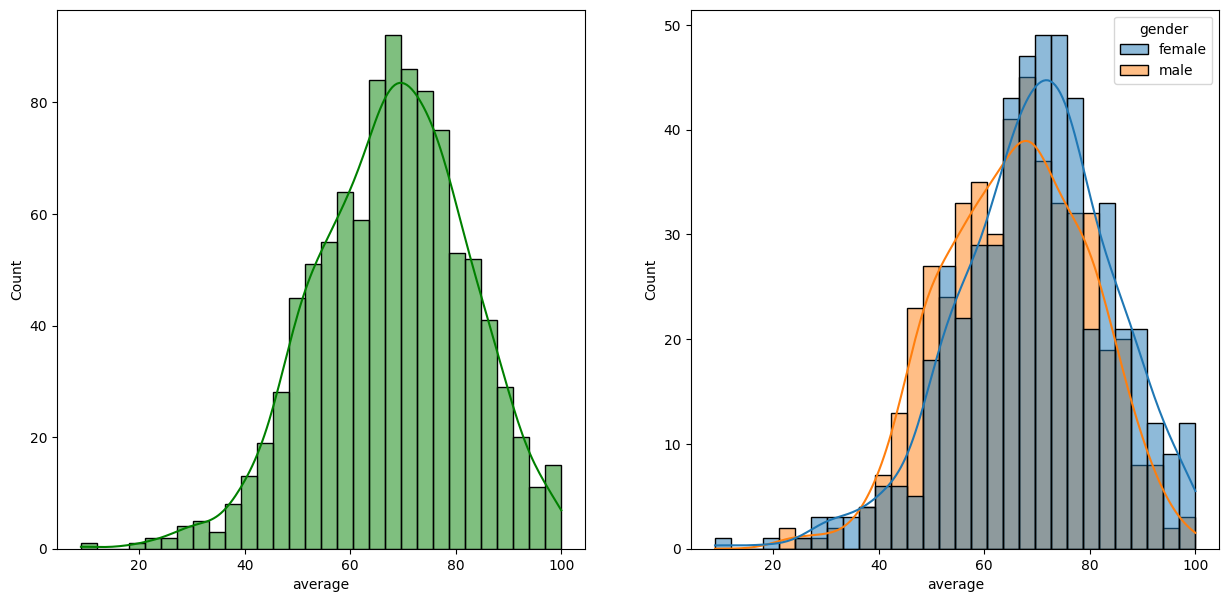

In [37]:
# exploring data (data visualization)
# average score
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='average',bins=30, kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='average',bins=30, kde=True, hue='gender')
plt.show()

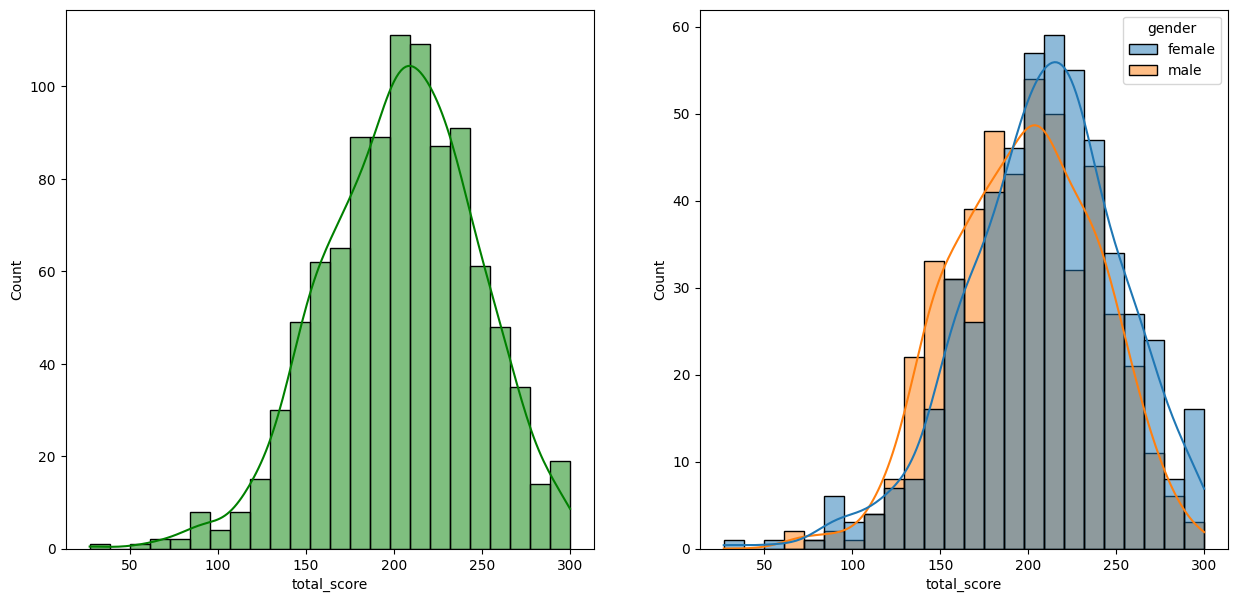

In [38]:
# total score
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='total_score', kde=True, color='g')
plt.subplot(1,2,2)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()


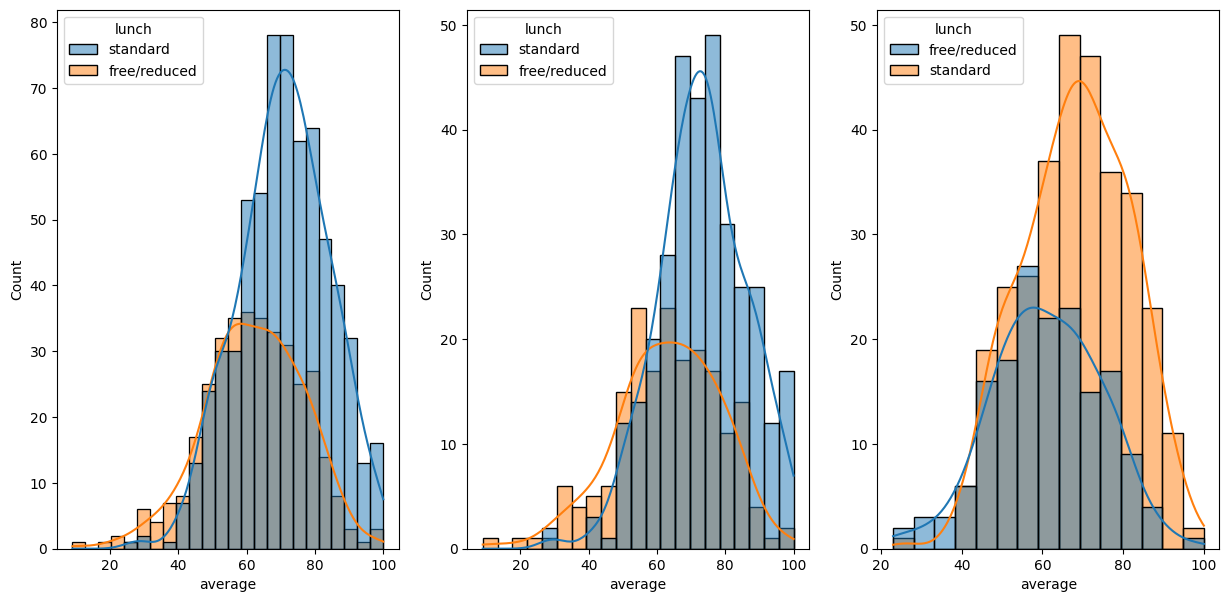

In [53]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue='lunch' )
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.show()

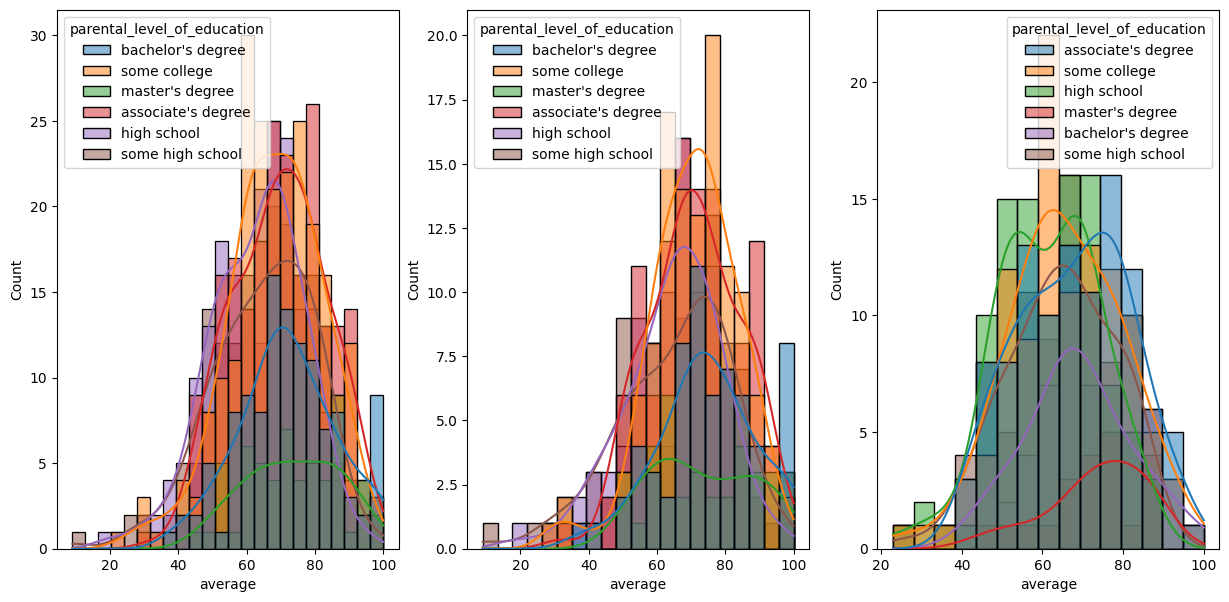

In [55]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education' )
plt.subplot(1,3,2)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

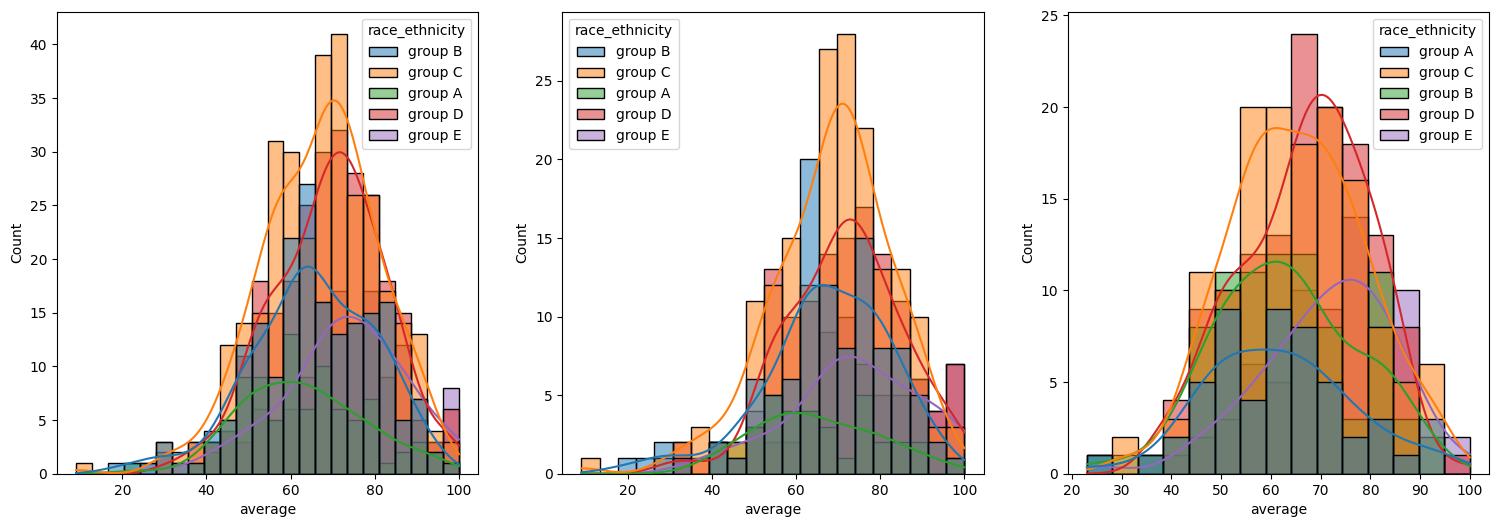

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

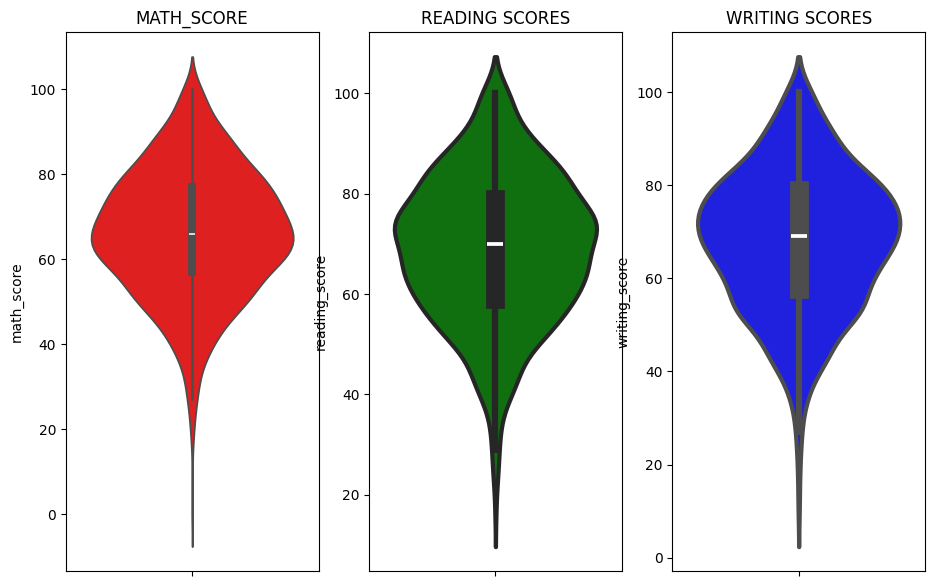

In [61]:
# Maximumum score of students in all three subjects

plt.figure(figsize=(15,7))
plt.subplot(1,4,1)
plt.title('MATH_SCORE')
sns.violinplot(data=df,y='math_score', color='r' )
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

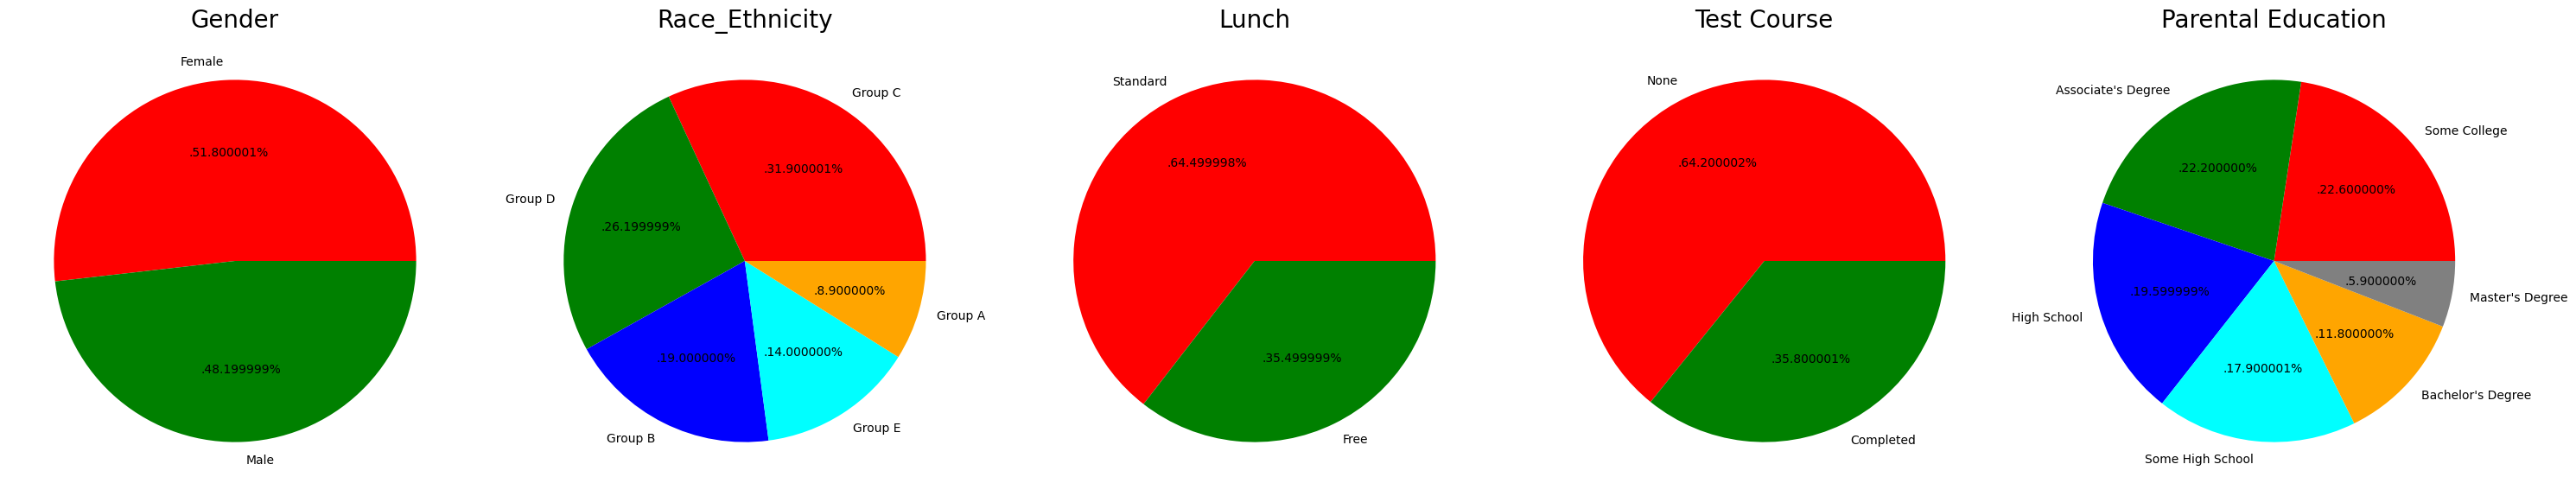

In [64]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()